# Classification models 

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data 

In [106]:
dataFrame = pd.read_csv('..\..\..\datasets\Human_Activity\combine_Phone_and_Watch_interpolated.csv')

In [107]:
dataFrame.head()

,Unnamed: 0,index,timestamp,activity,step_detector,audio_mic_1,audio_mic_2,audio_mic_3,audio_mic_4,gravity,...,gyroscope_X_watch,gyroscope_Y_watch,gyroscope_Z_watch,magnetometer_X_watch,magnetometer_Y_watch,magnetometer_Z_y,battery_y,heart_rate,pressure_combine,diffTimeSec
0,1,0,2017-06-29 09:57:30,Eat,1.0,11927.200000,7563.650340,32767.0,45.0,9.428560,...,-1.027466,0.728256,0.866241,42.903137,-9.513855,-25.811768,82.00,76.875000,963.811290,30.0
1,2,1,2017-06-29 09:58:00,Eat,1.0,9694.366667,7582.004297,32767.0,45.0,9.495720,...,-1.385284,1.318619,1.436371,28.717041,-23.501587,-18.550110,81.50,83.500000,964.262190,30.0
2,3,2,2017-06-29 09:58:30,Eat,1.0,7590.000000,7579.942257,32767.0,45.0,9.548030,...,-0.694199,0.503960,0.044128,34.047699,-12.238312,-14.639283,81.25,80.955714,963.352867,30.0
3,4,3,2017-06-29 09:59:00,Eat,1.0,11810.733333,7589.977663,32767.0,45.0,9.502039,...,-0.003113,-0.310699,-1.348114,39.378357,-0.975037,-10.728455,81.00,78.411429,963.610606,30.0
4,5,4,2017-06-29 09:59:30,Eat,1.0,7881.866667,7600.249840,32767.0,45.0,9.609119,...,0.115019,-0.297179,-0.684662,-11.760711,16.645813,-20.403798,81.00,73.322857,963.513331,30.0


In [108]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6160 entries, 0 to 6159
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              6160 non-null   int64  
 1   index                   6160 non-null   int64  
 2   timestamp               6160 non-null   object 
 3   activity                6160 non-null   object 
 4   step_detector           6160 non-null   float64
 5   audio_mic_1             6160 non-null   float64
 6   audio_mic_2             6160 non-null   float64
 7   audio_mic_3             6160 non-null   float64
 8   audio_mic_4             6160 non-null   float64
 9   gravity                 6160 non-null   float64
 10  linear_acceleration     6160 non-null   float64
 11  orientation_X_phone     6160 non-null   float64
 12  orientation_Y_phone     6160 non-null   float64
 13  orientation_Z_phone     6160 non-null   float64
 14  accelerometer_X_phone   6160 non-null   

In [109]:
FeaturesTable = dataFrame.drop(columns=['Unnamed: 0','index','timestamp','activity','diffTimeSec'])
FeaturesTable.head()

,step_detector,audio_mic_1,audio_mic_2,audio_mic_3,audio_mic_4,gravity,linear_acceleration,orientation_X_phone,orientation_Y_phone,orientation_Z_phone,...,accelerometer_Z_watch,gyroscope_X_watch,gyroscope_Y_watch,gyroscope_Z_watch,magnetometer_X_watch,magnetometer_Y_watch,magnetometer_Z_y,battery_y,heart_rate,pressure_combine
0,1.0,11927.200000,7563.650340,32767.0,45.0,9.428560,2.384370,22.952714,60.453024,-5.277635,...,1.480637,-1.027466,0.728256,0.866241,42.903137,-9.513855,-25.811768,82.00,76.875000,963.811290
1,1.0,9694.366667,7582.004297,32767.0,45.0,9.495720,1.978390,43.617109,81.183346,8.174922,...,2.818146,-1.385284,1.318619,1.436371,28.717041,-23.501587,-18.550110,81.50,83.500000,964.262190
2,1.0,7590.000000,7579.942257,32767.0,45.0,9.548030,1.396605,4.632983,75.299680,48.593347,...,2.174874,-0.694199,0.503960,0.044128,34.047699,-12.238312,-14.639283,81.25,80.955714,963.352867
3,1.0,11810.733333,7589.977663,32767.0,45.0,9.502039,5.458737,-32.125872,65.046507,-46.384025,...,1.531603,-0.003113,-0.310699,-1.348114,39.378357,-0.975037,-10.728455,81.00,78.411429,963.610606
4,1.0,7881.866667,7600.249840,32767.0,45.0,9.609119,2.982487,135.779456,77.457162,-25.646591,...,0.245060,0.115019,-0.297179,-0.684662,-11.760711,16.645813,-20.403798,81.00,73.322857,963.513331


In [110]:
label = dataFrame['activity']
label.unique()

array(['Eat', 'Walk', 'Running', 'In computer', 'Meeting', 'Sleep',
       'Video games', 'Picnic ', 'Watching TV', 'Cooking', 'Movie',
       'Pause', 'Football'], dtype=object)

<Axes: xlabel='count', ylabel='activity'>

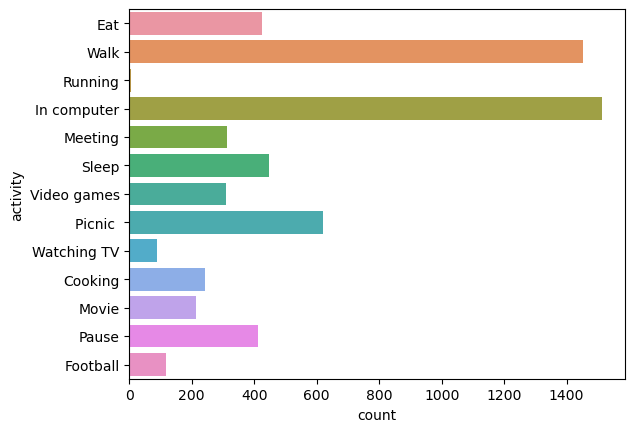

In [111]:
sns.countplot(y = label, data = label)

In [112]:
# Remove labels that occur fewer than 150 times and are not present in the smartphone dataset
label_to_remove = label.value_counts().loc[lambda x : x<150].index
label_to_remove

Index(['Football', 'Watching TV', 'Running'], dtype='object')

In [113]:
Idx = label.apply(lambda x: x == 'Football' or x == 'Watching TV' or x=='Running')
label = label[~Idx]
FeaturesTable = FeaturesTable[~Idx]


## Split Train and Test

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeaturesTable, label, test_size=0.20, random_state=42,shuffle=False)

Text(0.5, 1.0, 'Train Datset')

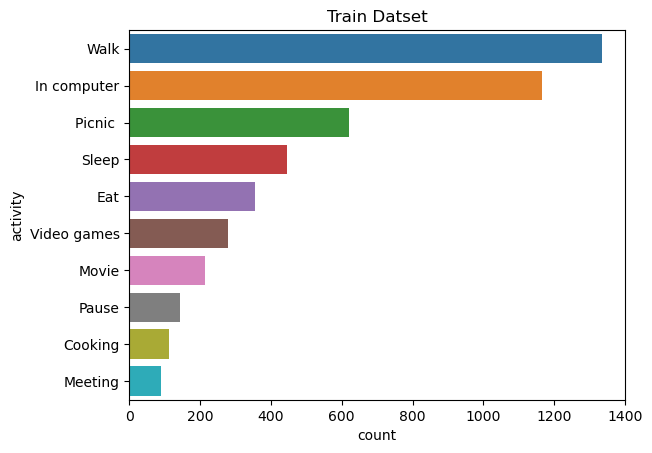

In [115]:
sns.countplot(y = y_train, order = y_train.value_counts().index).set_title('Train Datset')

Text(0.5, 1.0, 'Test Datset')

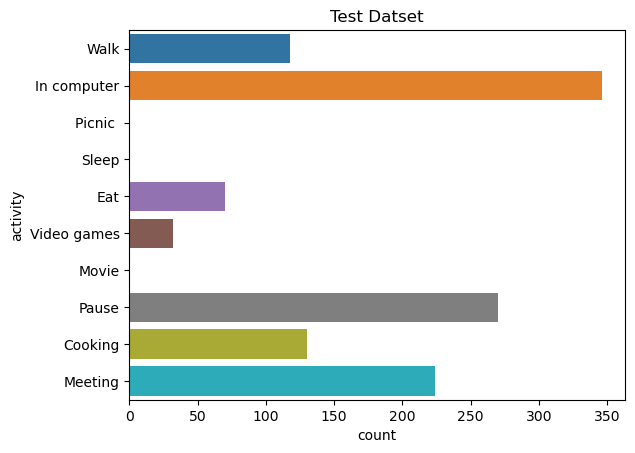

In [116]:
sns.countplot(y = y_test,order = y_train.value_counts().index).set_title('Test Datset')

## Standardize the Variables

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features_train = scaler.transform(X_train)
scaled_features_test = scaler.transform(X_test)

## Models

### Examining different models with different parameters

In [119]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

class PipelinesListMixin(object):
    @property
    def meta_estimators(self):
        scoring = 'f1_weighted'

        # Logistic Regression
        pipe_lr = Pipeline([('scl', StandardScaler()),
                            ('lr',  LogisticRegression(random_state=0))])
        param_grid = [{'lr__C': [10 ** int(C) for C in np.arange(-5, 5)],
                       'lr__penalty': ['l2', 'l1'],
                       'lr__class_weight': ['balanced',None]}]
        gs_lr = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring=scoring, cv=2, n_jobs=5)

        # SVM
        pipe_svm = Pipeline([('scl', StandardScaler()),
                            ('svm', SVC(random_state=0))])
        param_grid = [{'svm__C': [10 ** int(C) for C in np.arange(-5, 5)],
                        'svm__kernel': ['linear']},
                      {'svm__C': [10 ** int(C) for C in np.arange(-5, 5)],
                        'svm__gamma': ['auto'],
                        'svm__kernel': ['rbf'],
                        'svm__class_weight': ['balanced',None]}]
        gs_svm = GridSearchCV(estimator=pipe_svm, param_grid=param_grid, scoring=scoring, cv=2, n_jobs=5)

        # Tree
        pipe_tree = Pipeline([('tree', DecisionTreeClassifier(random_state=0))])
        param_grid = [{'tree__criterion': ['entropy'],
                       'tree__max_depth': [3],
                       'tree__class_weight': ['balanced',None]}]
        gs_tree = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=scoring, cv=2,
                                n_jobs=5)

        # Adaboost
        tree = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=1)
        pipe_ada = Pipeline([('adaboost', AdaBoostClassifier(base_estimator=tree, random_state=0))])
        param_grid = [{'adaboost__n_estimators': [500],
                       'adaboost__learning_rate': [0.1]}]
        gs_ada = GridSearchCV(estimator=pipe_ada, param_grid=param_grid, scoring=scoring, cv=2,
                              n_jobs=5)
 
        # Forest
        pipe_forest = Pipeline([('forest', RandomForestClassifier(random_state=0))])
        param_grid = [{'forest__criterion': ['entropy'],
                       'forest__n_estimators': [10],
                       'forest__max_depth': [None, 10, 20, 30],
                       'forest__class_weight':['balanced',None]}]
        gs_forest = GridSearchCV(estimator=pipe_forest, param_grid=param_grid, scoring=scoring, cv=2,
                                  n_jobs=5)

        # KNN
        pipe_knn = Pipeline( [('knn', KNeighborsClassifier())])
        param_grid = [{'knn__n_neighbors': [5],
                       'knn__p': [2]}]
        gs_knn = GridSearchCV(estimator=pipe_knn, param_grid=param_grid, scoring=scoring, cv=2,
                              n_jobs=5)
        
        return [gs_lr, gs_svm, gs_ada, gs_tree, gs_forest, gs_knn] 


class ComparingClassifiers(PipelinesListMixin):
    def fit(self, X, y, scoring):
        algorithm_scores = []
        for gs in self.meta_estimators:
            #In each cross validation of cross_val_score function the GridSearchCV (gs) is working and run internal cross validation.
            #The aim is to do another level of validation set - for selecting the best algorithm.
            scores = cross_val_score(gs, X, y, scoring=scoring, cv=5, n_jobs=10)
            mean_scores = np.mean(scores) # Scores of all best models of the same algorithm (on each of the iterations of the outer cross validation).
            algorithm_scores.append(mean_scores)
            print('Mean score: ${:.3f}$ for algorithm: ${}$'.format(mean_scores, gs.estimator.steps[-1][0]))
        best_grid_search = self.meta_estimators[np.argmax(algorithm_scores)]
        return best_grid_search.fit(X, y)

best_algorithm = ComparingClassifiers().fit(X_train, y_train, 'f1_weighted')
print('The best algorithm is: ${}$. The accurate on all training data is: ${}$'.format(best_algorithm.estimator.steps[-1][0], best_algorithm.score(X_train, y_train)))

Mean score: $0.459$ for algorithm: $lr$
Mean score: $0.504$ for algorithm: $svm$
Mean score: $0.198$ for algorithm: $adaboost$
Mean score: $0.404$ for algorithm: $tree$
Mean score: $0.632$ for algorithm: $forest$
Mean score: $0.578$ for algorithm: $knn$
The best algorithm is: $forest$. The accurate on all training data is: $0.9997893176039764$


In [120]:
# Check model preformance on the best model 
from sklearn.metrics import classification_report,confusion_matrix
pred = best_algorithm.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  0  57   4  15   1   0   3   0  50]
 [  0  17  17   0  13   0   0   0  23]
 [  5  57 256   0   1   0   0   0  27]
 [  0  17 151   0   6   0   0  21  29]
 [  0   0   0   0   0   0   0   0   0]
 [  0  55  33  12   0  35 105   0  30]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0  32   0   0   0   0   0   0]
 [  0  24  64   0  14   1   0   4  11]]
              precision    recall  f1-score   support

     Cooking       0.00      0.00      0.00       130
         Eat       0.07      0.24      0.11        70
 In computer       0.46      0.74      0.57       346
     Meeting       0.00      0.00      0.00       224
       Movie       0.00      0.00      0.00         0
       Pause       0.97      0.13      0.23       270
       Sleep       0.00      0.00      0.00         0
 Video games       0.00      0.00      0.00        32
        Walk       0.06      0.09      0.08       118

    accuracy                           0.27      1190
   macro avg       0.17      0.13      0.11      119

c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
from sklearn.ensemble import RandomForestClassifier
pipe_forest = Pipeline([('forest', RandomForestClassifier(random_state=0))])
param_grid = [{'forest__criterion': ['entropy'],
                'forest__n_estimators': [10],
                'forest__max_depth': [None, 10, 20, 30],
                'forest__class_weight':['balanced',None]}]
gs_forest = GridSearchCV(estimator=pipe_forest, param_grid=param_grid, scoring='f1_weighted', cv=2,
                            n_jobs=5)

gs_forest.fit(X_train, y_train)
best_params = gs_forest.best_params_
best_max_depth = best_params['forest__max_depth']
print("Best Max Depth:", best_max_depth)

best_class_weight = best_params['forest__class_weight']
print("Class Weight:", best_class_weight)

Best Max Depth: None
Class Weight: balanced


### Performance analysis of the best model

In [122]:
from sklearn.metrics import classification_report,confusion_matrix
clf = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state=0, max_depth=None, class_weight="balanced")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  0  57   4  15   1   0   3   0  50]
 [  0  17  17   0  13   0   0   0  23]
 [  5  57 256   0   1   0   0   0  27]
 [  0  17 151   0   6   0   0  21  29]
 [  0   0   0   0   0   0   0   0   0]
 [  0  55  33  12   0  35 105   0  30]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0  32   0   0   0   0   0   0]
 [  0  24  64   0  14   1   0   4  11]]
              precision    recall  f1-score   support

     Cooking       0.00      0.00      0.00       130
         Eat       0.07      0.24      0.11        70
 In computer       0.46      0.74      0.57       346
     Meeting       0.00      0.00      0.00       224
       Movie       0.00      0.00      0.00         0
       Pause       0.97      0.13      0.23       270
       Sleep       0.00      0.00      0.00         0
 Video games       0.00      0.00      0.00        32
        Walk       0.06      0.09      0.08       118

    accuracy                           0.27      1190
   macro avg       0.17      0.13      0.11      119

c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Check the importance of each feature

In [124]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

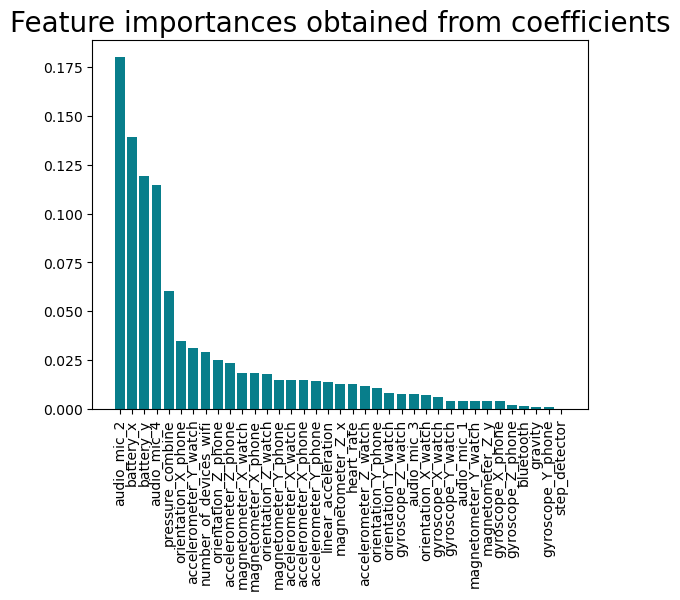

In [125]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Re-run the model using only the 5 most important features

In [126]:
print(importances['Attribute'][:5])

2          audio_mic_2
20           battery_x
34           battery_y
4          audio_mic_4
36    pressure_combine
Name: Attribute, dtype: object


In [127]:
featurereList = list(importances['Attribute'][:5])
X_train_part = X_train[featurereList]
X_test_part  = X_test[featurereList]

In [128]:
clf = RandomForestClassifier(n_estimators=10, criterion ='entropy', max_depth=None, class_weight="balanced", random_state=0)
clf.fit(X_train_part, y_train)
pred = clf.predict(X_test_part)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[  1  28  25   0   8   0   4   0  64]
 [  0   6   0   0  20   0   0   0  44]
 [  0   0 242   0   0   0   8   0  96]
 [  0  40 157   0  24   1   0   0   2]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   9   0  67 152   0  42]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0  32   0   0   0   0   0   0]
 [  0  25  54   0  30   9   0   0   0]]
              precision    recall  f1-score   support

     Cooking       1.00      0.01      0.02       130
         Eat       0.06      0.09      0.07        70
 In computer       0.47      0.70      0.57       346
     Meeting       0.00      0.00      0.00       224
       Movie       0.00      0.00      0.00         0
       Pause       0.87      0.25      0.39       270
       Sleep       0.00      0.00      0.00         0
 Video games       0.00      0.00      0.00        32
        Walk       0.00      0.00      0.00       118

    accuracy                           0.27      1190
   macro avg       0.27      0.12      0.12      119

c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asafl\anaconda3\en

#### Re-run the model using only the 5 least important features

In [129]:
print(importances['Attribute'][-5:])

15    gyroscope_Z_phone
21            bluetooth
5               gravity
14    gyroscope_Y_phone
0         step_detector
Name: Attribute, dtype: object


In [130]:
featurereList = list(importances['Attribute'][-5:])
X_train_part = X_train[featurereList]
X_test_part  = X_test[featurereList]

In [131]:
clf = RandomForestClassifier(n_estimators=10, criterion ='entropy', max_depth=None, random_state=0)
clf.fit(X_train_part, y_train)
pred = clf.predict(X_test_part)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[  1  29  46   1   2   4   9   3   5  30]
 [  2   8  23   0   3   0  12   1   4  17]
 [  3  35 140   6  12   3  50  10  12  75]
 [  1   8  66   1   8  10  22   5   7  96]
 [  0   0   0   0   0   0   0   0   0   0]
 [  6  15  50   5   6   3  25   6   9 145]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0  24   6   0   0   0   2   0   0   0]
 [  1   9  42   2   3   1  14   3   7  36]]
              precision    recall  f1-score   support

     Cooking       0.07      0.01      0.01       130
         Eat       0.06      0.11      0.08        70
 In computer       0.38      0.40      0.39       346
     Meeting       0.07      0.00      0.01       224
       Movie       0.00      0.00      0.00         0
       Pause       0.14      0.01      0.02       270
     Picnic        0.00      0.00      0.00         0
       Sleep       0.00      0.00      0.00         0
 Video games       0.00      0.00      0.00        32
        Walk       0.09     

c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
